In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import time
from scipy.signal import butter, filtfilt

1) На вход передатчика подается сигнал косинуса с частотами 50, 150 и 450 Гц. Определите спектр
сигнала с помощью стандартной функции быстрого преобразования Фурье.

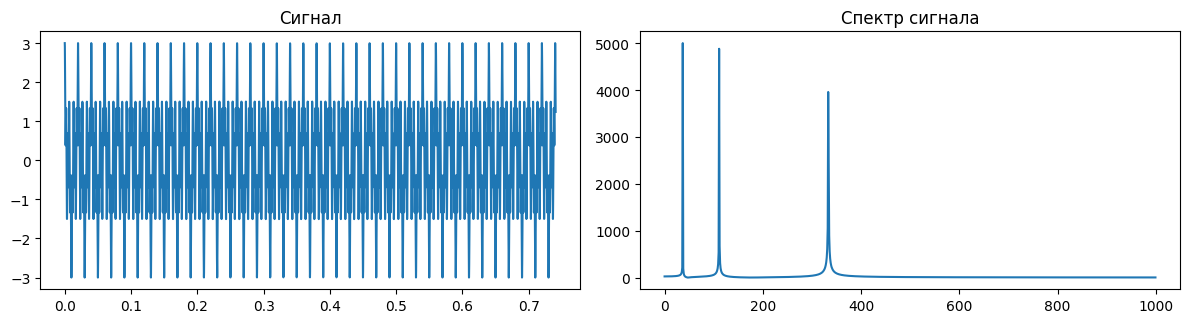

In [ ]:
N = 1000
fmax = 1350
T = 1.0 / fmax
freq = [50, 150, 450]

x = np.linspace(0.0, T * N, 10 * N)
signal1 = sum(np.cos(2 * np.pi * x * f) for f in freq)

yf = fft(signal1)

plt.figure(figsize=(12, 12))

plt.subplot(4, 2, 1)
plt.plot(x, signal1)
plt.title('Сигнал')

plt.subplot(4, 2, 2)

plt.plot(np.abs(yf)[:1000])
plt.title('Спектр сигнала')

plt.tight_layout()
plt.show()

2) Реализовать алгоритм фильтра Баттерворта нижних частот 2-го порядка (ФНЧ) к сигналу из
пункта 1, убедиться, что происходит подавление высоких частот сигнала 150 и 450 Гц. При
моделировании ФНЧ воспользоваться формулой (32) из методички “Козулин Цифровая
обработка сигналов Python.pdf”. Частоту среза фильтра Баттерворта подберите самостоятельно. В
данном примере частота среза может варьироваться в диапазоне от 70 до 120 Гц.

Построить графики исходного и отфильтрованного сигнала, спектра сигнала и спектр фильтра
Баттерворта. Убедитесь, что амплитуда исходного сигнала для частоты 50 Гц будет совпадать с
амплитудой отфильтрованного сигнала.

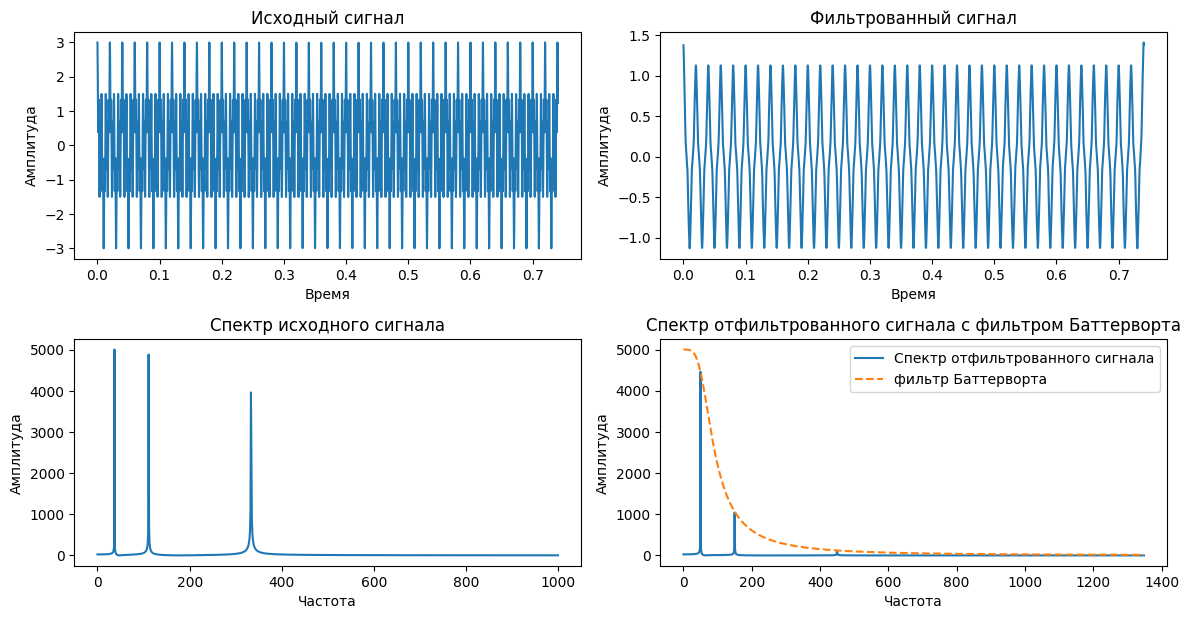

In [ ]:
def LPF(frequency, cutoff_frequency):
    return 1 / np.sqrt(1 + (frequency / cutoff_frequency) ** 4)

freq = [50, 150, 450]
signal2 = sum(np.cos(2 * np.pi * x * f) for f in freq)


yf = fft(signal2)
xf = np.fft.fftfreq(10 * N, T / 10)

# Фильтрация нижних частот
H_xf = LPF(xf, 70)
yfh = H_xf * yf
yiff = ifft(yfh)

amplification_factor = 5000 # Коэффициент усиления
H_xf_amplified = H_xf * amplification_factor


plt.figure(figsize=(12, 12))

plt.subplot(4, 2, 1)
plt.plot(x, signal2)
plt.title('Исходный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 2)
plt.plot(x, np.real(yiff))
plt.title('Фильтрованный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 3)
plt.plot(np.abs(yf)[:1000])
plt.title('Спектр исходного сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')


plt.subplot(4, 2, 4)
plt.plot(xf[:1000], np.abs(yfh)[:1000], label='Спектр отфильтрованного сигнала')
plt.plot(xf[:1000], H_xf_amplified[:1000], label='фильтр Баттерворта', linestyle='--')
plt.title('Спектр отфильтрованного сигнала с фильтром Баттерворта')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.legend()

plt.tight_layout()
plt.show()

4) Построить фильтр высоких частот (ФВЧ) к сигналу, убедиться, что происходит
подавление низких частот сигнала (50 и 150 Гц), воспользовавшись формулой (35)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


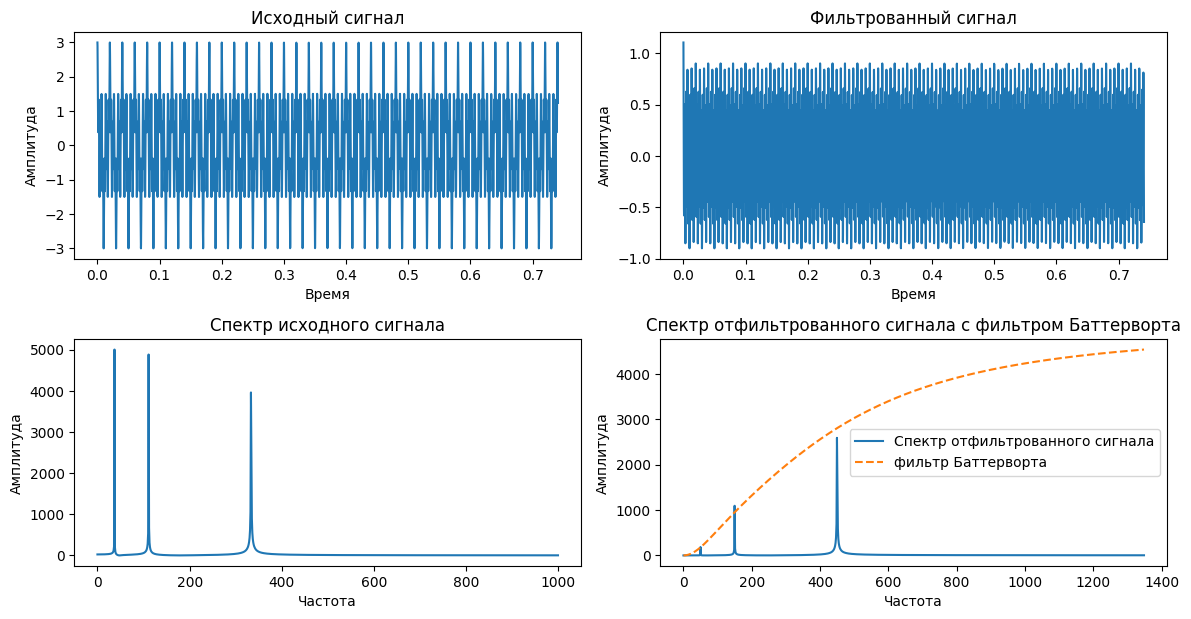

In [ ]:
def HPF(w, wc):
    return (w ** 2) / (w ** 2 - 1j * w * wc * np.sqrt(2) + wc ** 2)

yf = fft(signal1)
xf = np.fft.fftfreq(10 * N, T / 10)

H_xf = HPF(xf, 250)
yfh = H_xf * yf

yiff = ifft(yfh)


amplification_factor = 5000
H_xf_amplified = H_xf * amplification_factor


plt.figure(figsize=(12, 12))

plt.subplot(4, 2, 1)
plt.plot(x, signal2)
plt.title('Исходный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 2)
plt.plot(x, np.real(yiff))
plt.title('Фильтрованный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 3)
plt.plot(np.abs(yf)[:1000])
plt.title('Спектр исходного сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')


plt.subplot(4, 2, 4)
plt.plot(xf[:1000], np.abs(yfh)[:1000], label='Спектр отфильтрованного сигнала')
plt.plot(xf[:1000], H_xf_amplified[:1000], label='фильтр Баттерворта', linestyle='--')
plt.title('Спектр отфильтрованного сигнала с фильтром Баттерворта')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.legend()

plt.tight_layout()
plt.show()



5) Построить полосовой фильтр и заграждающий фильтр (ПФ/ЗФ) настроенный на частоту
150Гц. При моделировании использовать формулы (36) и (37).

Построить графики исходного и отфильтрованного сигнала, спектра сигнала и фильтров
ПФ/ЗФ.


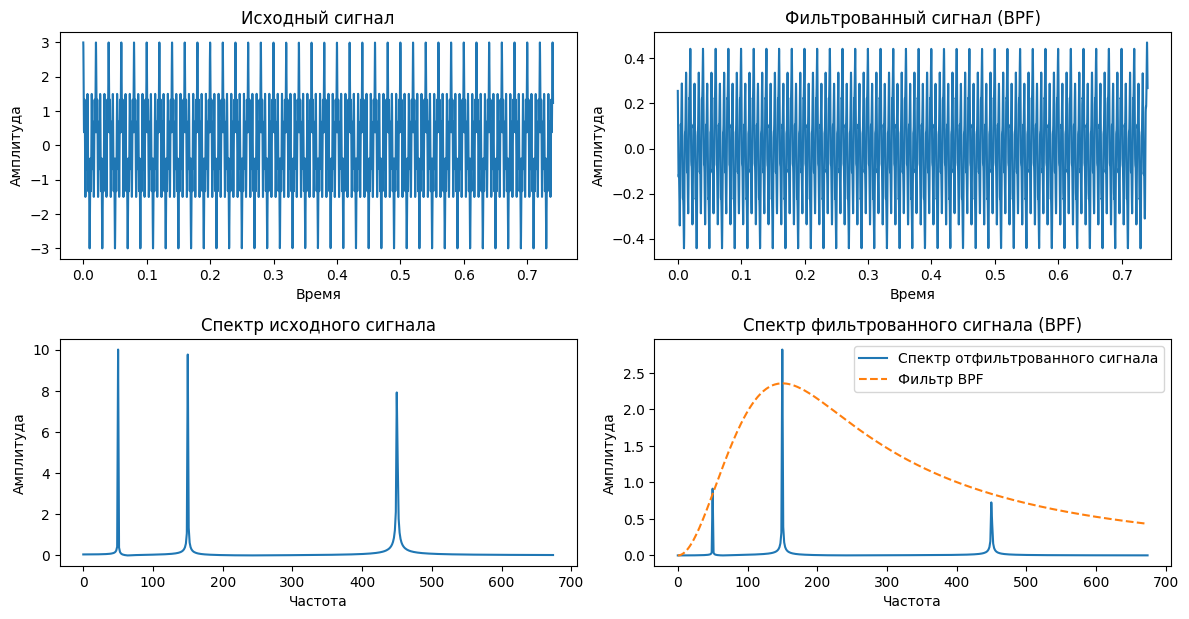

In [ ]:
def BPF(w, wc): #полосовой фильтр
    return LPF(w, wc) * HPF(w, wc)

N = 1000
fmax = 1350
T = 1.0 / fmax
freq = [50, 150, 450]

x = np.linspace(0.0, N * T, 10 * N)
y = sum(np.cos(2 * np.pi * x * f) for f in freq)

yf = fft(y)
xf = np.fft.fftfreq(10 * N, T / 10)


H_xf = BPF(xf, 150)
yfh = H_xf * yf

yiff = ifft(yfh)


amplification_factor = 5000
H_xf_amplified = H_xf * amplification_factor

plt.figure(figsize=(12, 12))

plt.subplot(4, 2, 1)
plt.plot(x, y)
plt.title('Исходный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 2)
plt.plot(x, np.real(yiff))
plt.title('Фильтрованный сигнал (BPF)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 3)
plt.plot(xf[:N // 2], 2.0 / N * np.abs(yf[:N // 2]))
plt.title('Спектр исходного сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 4)
plt.plot(xf[:N // 2], 2.0 / N * np.abs(yfh[:N // 2]), label='Спектр отфильтрованного сигнала')
plt.plot(xf[:N // 2], H_xf_amplified[:N // 2] * (2.0 / N), label='Фильтр BPF', linestyle='--')
plt.title('Спектр фильтрованного сигнала (BPF)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.legend()

plt.tight_layout()
plt.show()



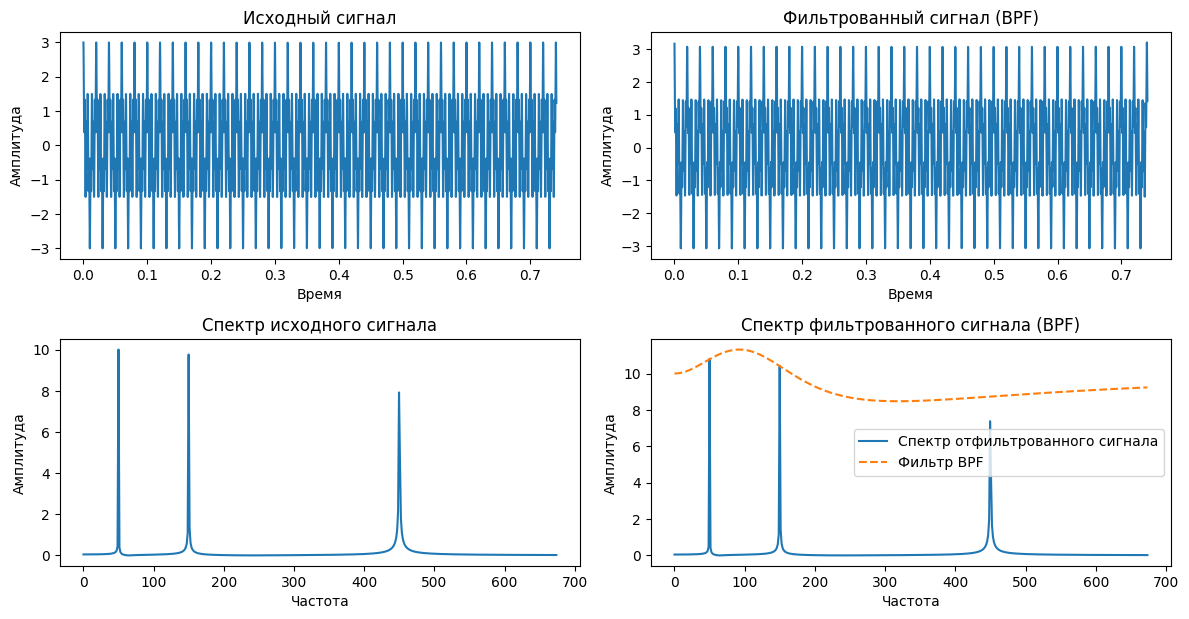

In [ ]:
def BSF(w, wc): #заграждающий фильтр
    return LPF(w, wc) + HPF(w, wc)

N = 1000
fmax = 1350
T = 1.0 / fmax
freq = [50, 150, 450]

x = np.linspace(0.0, N * T, 10 * N)
y = sum(np.cos(2 * np.pi * x * f) for f in freq)

yf = fft(y)
xf = np.fft.fftfreq(10 * N, T / 10)


H_xf = BSF(xf, 150)
yfh = H_xf * yf

yiff = ifft(yfh)


amplification_factor = 5000
H_xf_amplified = H_xf * amplification_factor

plt.figure(figsize=(12, 12))

plt.subplot(4, 2, 1)
plt.plot(x, y)
plt.title('Исходный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 2)
plt.plot(x, np.real(yiff))
plt.title('Фильтрованный сигнал (BPF)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 3)
plt.plot(xf[:N // 2], 2.0 / N * np.abs(yf[:N // 2]))
plt.title('Спектр исходного сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 4)
plt.plot(xf[:N // 2], 2.0 / N * np.abs(yfh[:N // 2]), label='Спектр отфильтрованного сигнала')
plt.plot(xf[:N // 2], H_xf_amplified[:N // 2] * (2.0 / N), label='Фильтр BPF', linestyle='--')
plt.title('Спектр фильтрованного сигнала (BPF)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.legend()

plt.tight_layout()
plt.show()

6) Согласно формулам (28, 29) возможно построить фильтр Баттерворта любого порядка.
Постройте фильтр Баттерворта 4-го и 5-го порядка с автоматическим определением
полюсов фильтра. Реализуйте пункт 1 данной лабораторной для Фильтра Баттерворта 5-го
порядка.

[ 0.    1.35  2.7  ... -4.05 -2.7  -1.35]


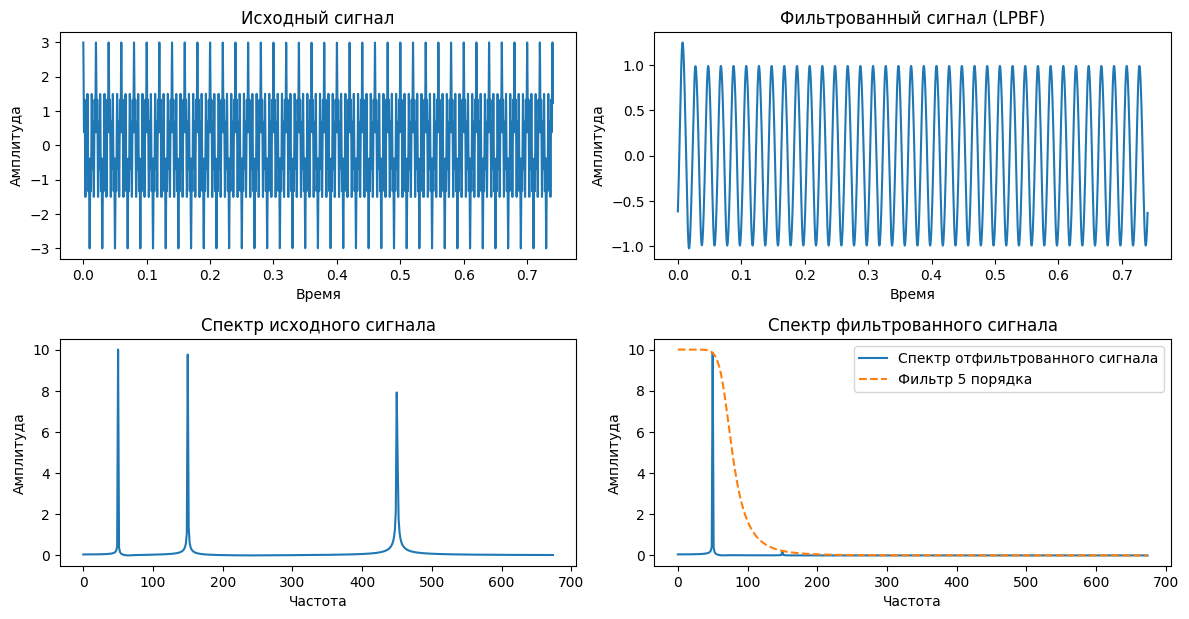

In [ ]:
def LPBF(w, wc, n):
    step = np.pi / n
    ans = np.exp(1j * np.array([np.pi / 2 + step / 2 + step * i for i in range(n)]))

    all_res = []

    for ws in w:
        s = 1j * ws / wc
        res = 1

        for i in range(n):
            res *= 1 / (s - ans[i])

        all_res.append(res)

    return np.array(all_res)



N = 1000
fmax = 1350
T = 1.0 / fmax
freq = [50, 150, 450]

x = np.linspace(0.0, N * T, 10 * N)
y = sum(np.cos(2 * np.pi * x * f) for f in freq)

yf = fft(y)
xf = np.fft.fftfreq(10 * N, T / 10)

H_xf = LPBF(xf, 70, 5)

yfh = H_xf * yf

yiff = ifft(yfh)

amplification_factor = 5000
H_xf_amplified = H_xf * amplification_factor

plt.figure(figsize=(12, 12))

plt.subplot(4, 2, 1)
plt.plot(x, y)
plt.title('Исходный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 2)
plt.plot(x, np.real(yiff))
plt.title('Фильтрованный сигнал (LPBF)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 3)
plt.plot(xf[:N // 2], 2.0 / N * np.abs(yf[:N // 2]))
plt.title('Спектр исходного сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 4)
plt.plot(xf[:N // 2], 2.0 / N * np.abs(yfh[:N // 2]), label='Спектр отфильтрованного сигнала')
plt.plot(xf[:N // 2], np.abs(H_xf_amplified[:N // 2] * (2.0 / N)), label='Фильтр 5 порядка', linestyle='--')
plt.title('Спектр фильтрованного сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.legend()

plt.tight_layout()
plt.show()

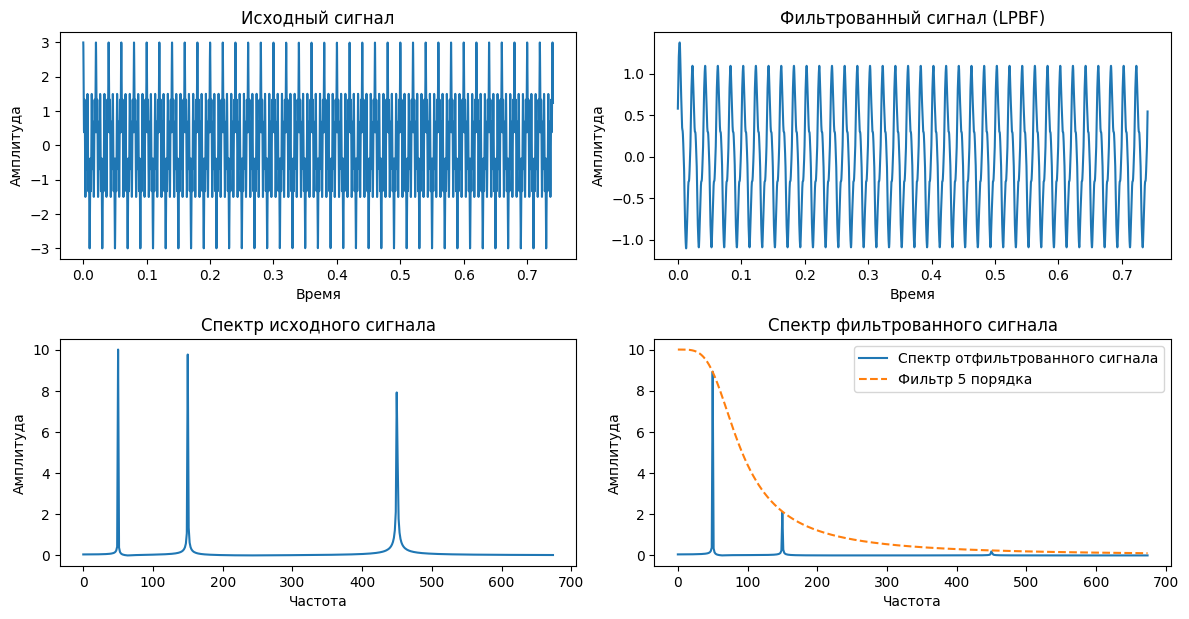

In [ ]:
def LPBF(w, wc, n):
    step = np.pi / n
    ans = np.exp(1j * np.array([np.pi / 2 + step / 2 + step * i for i in range(n)]))

    all_res = []

    for ws in w:
        s = 1j * ws / wc
        res = 1

        for i in range(n):
            res *= 1 / (s - ans[i])

        all_res.append(res)

    return np.array(all_res)



N = 1000
fmax = 1350
T = 1.0 / fmax
freq = [50, 150, 450]

x = np.linspace(0.0, N * T, 10 * N)
y = sum(np.cos(2 * np.pi * x * f) for f in freq)

yf = fft(y)
xf = np.fft.fftfreq(10 * N, T / 10)

H_xf = LPBF(xf, 70, 2)

yfh = H_xf * yf

yiff = ifft(yfh)

amplification_factor = 5000
H_xf_amplified = H_xf * amplification_factor

plt.figure(figsize=(12, 12))

plt.subplot(4, 2, 1)
plt.plot(x, y)
plt.title('Исходный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 2)
plt.plot(x, np.real(yiff))
plt.title('Фильтрованный сигнал (LPBF)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 3)
plt.plot(xf[:N // 2], 2.0 / N * np.abs(yf[:N // 2]))
plt.title('Спектр исходного сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 4)
plt.plot(xf[:N // 2], 2.0 / N * np.abs(yfh[:N // 2]), label='Спектр отфильтрованного сигнала')
plt.plot(xf[:N // 2], np.abs(H_xf_amplified[:N // 2] * (2.0 / N)), label='Фильтр 5 порядка', linestyle='--')
plt.title('Спектр фильтрованного сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.legend()

plt.tight_layout()
plt.show()

8) Сравните Ваш алгоритм ФНЧ Баттерворта 5-го порядка с встроенным фильтром
Баттерворта библиотеки scipy.signal также для 5-го порядка используя.

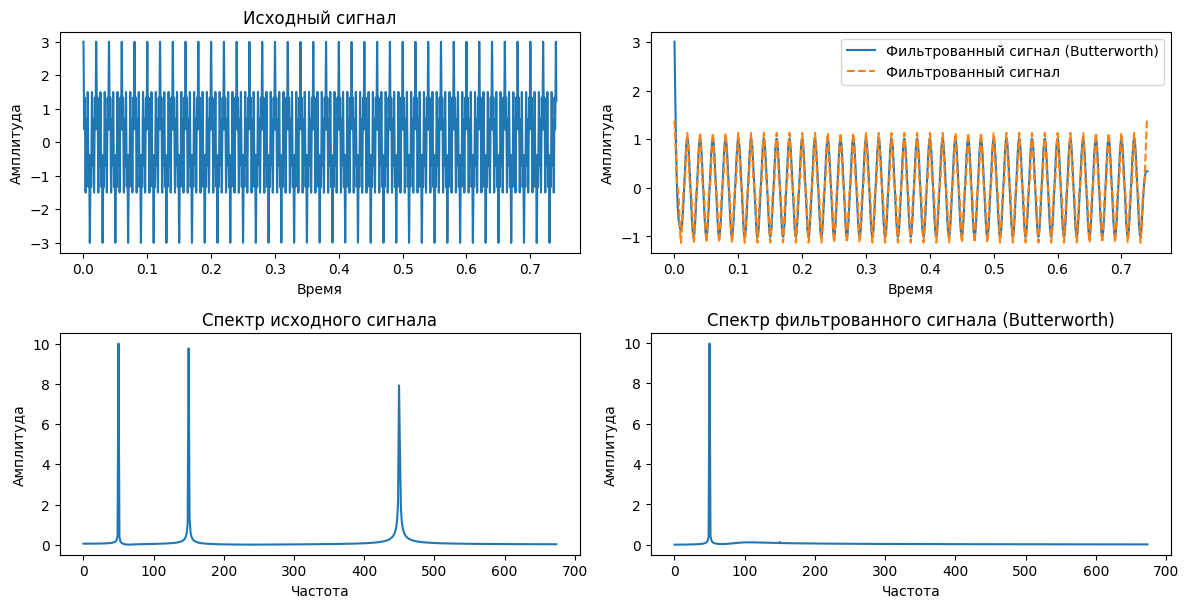

In [ ]:
nyquist = 5 * N
normal_cutoff = 70 / nyquist
b, a = butter(5, normal_cutoff, 'low', analog=False)
yiff = filtfilt(b, a, y)
yfh = fft(yiff)

H_xf1 = LPF(xf, 70)
yf1 = fft(signal1)
yfh1 = H_xf1 * yf1
yiff1 = ifft(yfh1)

plt.figure(figsize=(12, 12))

plt.subplot(4, 2, 5)
plt.plot(x, y)
plt.title('Исходный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 6)
plt.plot(x, np.real(yiff), label = 'Фильтрованный сигнал (Butterworth)')
plt.plot(x, np.real(yiff1), linestyle='--', label = 'Фильтрованный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.legend()


plt.subplot(4, 2, 7)
plt.plot(xf[:N // 2], 2.0 / N * np.abs(yf[:N // 2]))
plt.title('Спектр исходного сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 8)
plt.plot(xf[:N // 2], 2.0 / N * np.abs(yfh[:N // 2]))
plt.title('Спектр фильтрованного сигнала (Butterworth)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

9) Добавить шум к исходному сигналу, посмотрите как происходит фильтрация для
зашумленного сигнала.

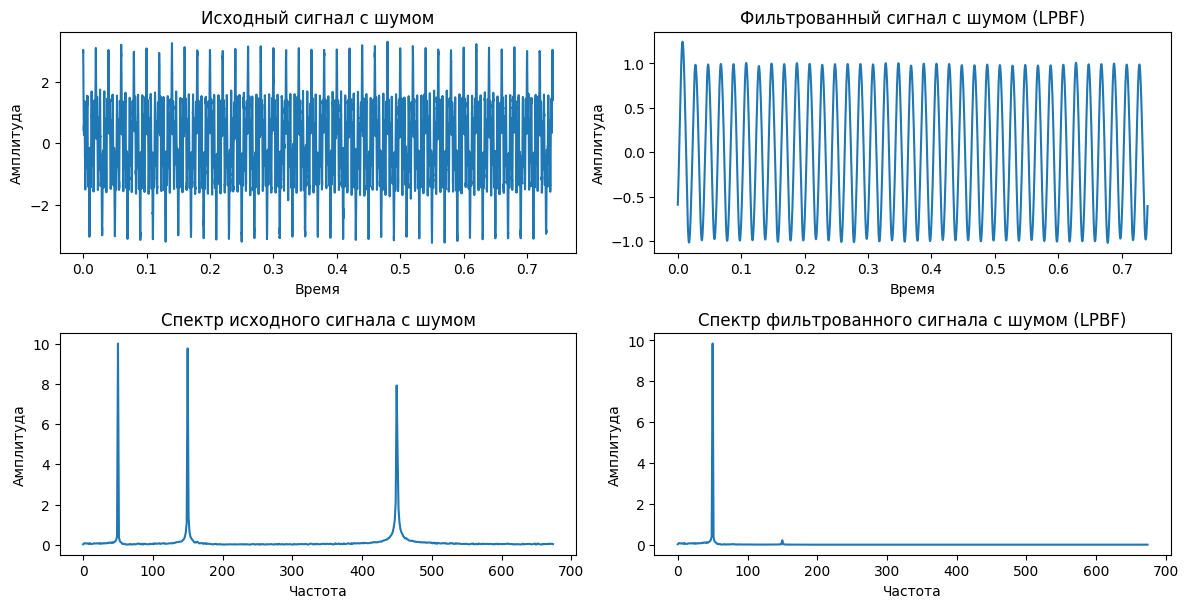

In [ ]:
N = 1000
fmax = 1350
T = 1.0 / fmax
freq = [50, 150, 450]

x = np.linspace(0.0, N * T, 10 * N)
y = sum(np.cos(2 * np.pi * x * f) for f in freq)

yf = fft(y)
xf = np.fft.fftfreq(10 * N, T / 10)

H_xf = LPBF(xf, 70, 5)

yfh = H_xf * yf

yiff = ifft(yfh)

plt.figure(figsize=(12, 12))



y = sum(np.cos(2 * np.pi * x * f) for f in freq) + np.random.normal(size=y.shape) / 10
yf = fft(y)
xf = np.fft.fftfreq(10 * N, T / 10)

H_xf = LPBF(xf, 70, 5)

yfh = H_xf * yf

yiff = ifft(yfh)

plt.subplot(4, 2, 5)
plt.plot(x, y)
plt.title('Исходный сигнал с шумом')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 6)
plt.plot(x, np.real(yiff))
plt.title('Фильтрованный сигнал с шумом (LPBF)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 7)
plt.plot(xf[:N // 2], 2.0 / N * np.abs(yf[:N // 2]))
plt.title('Спектр исходного сигнала с шумом')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')

plt.subplot(4, 2, 8)
plt.plot(xf[:N // 2], 2.0 / N * np.abs(yfh[:N // 2]))
plt.title('Спектр фильтрованного сигнала с шумом (LPBF)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()